In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import gc
import itertools
from copy import deepcopy

In [2]:
#changing the path 
os.chdir('C:/Uconn MSBA/studies/Kaggle/data and code/challenge')

In [3]:
# Reading the files
ed = pd.read_csv('education.csv')
wu = pd.read_csv('world_university_rankings.csv')

In [4]:
#checking first five values
wu.head()

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Publications,Influence,Citations,Broad Impact,Patents,Score,rank
0,1Top 0.1%,Harvard University,USA,1,1,1,1,1,1,1,1,2,100.00,1
1,2Top 0.1%,Stanford University,USA,2,8,2,2,5,3,2,3,7,96.86,2
2,3Top 0.1%,Massachusetts Institute of Technology,USA,3,2,12,3,14,2,3,2,1,95.72,3
3,4Top 0.1%,University of Cambridge,United Kingdom,1,3,10,6,10,7,17,13,52,93.14,4
4,5Top 0.1%,University of Oxford,United Kingdom,2,7,14,9,6,6,4,9,19,92.20,5


In [5]:
#checking first five values
ed.head()

,school,degrees
0,Youngstown State University,"['Bachelors of Arts', 'Associate of Arts']"
1,Full Sail Real World Education,['B.A.']
2,"School of Computer Science, Carnegie Mellon Un...","['Certificate of Completion', 'B.S.']"
3,University of California,['Bachelor of Science']
4,King's College London,['MBA']


# Visualisation 

In [6]:
#checking most common schol , University of California appears 40 times
import nltk
fdist = nltk.FreqDist(ed['school'])
fdist.most_common(25)

[('University of California', 40),
 ('California State University', 28),
 ('University of Southern California', 23),
 ('San Jose State University', 15),
 ('UCLA', 11),
 ('UNIVERSITY OF CALIFORNIA', 9),
 ('Stanford University', 7),
 ('New York University', 7),
 ('University of Southern California, Marshall School of Business', 6),
 ('Boston University', 6),
 ('California State University Northridge', 5),
 ('Santa Clara University', 5),
 ('Pepperdine University', 5),
 ('LOYOLA MARYMOUNT UNIVERSITY', 4),
 ('University of San Francisco', 4),
 ('Arizona State University', 4),
 ('University of Maryland', 4),
 ('The Ohio State University', 4),
 ('California Polytechnic State University', 4),
 ('University of Florida', 3),
 ('University of Miami', 3),
 ('University of Central Florida', 3),
 ('Golden Gate University', 3),
 ('IIT', 3),
 ('Academy of Art University', 3)]

In [7]:
# All the names of institution are appended to a list 

my_list = []
len_df= len(wu['Institution'])
for i in range(0,len_df):
     #print(str(wu['Institution'][i]))
    my_list.append(str(wu['Institution'][i]))


In [8]:
# all teh words in the list are converted to a token 
tokens = nltk.tokenize.word_tokenize(str(my_list))
tokens = [token.lower() for token in tokens]

In [9]:
# removing all punctuations 
import re

letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(my_list))


In [31]:
# converting all tokens to lower case 
tokens = nltk.tokenize.word_tokenize(letters_only)
tokens = [token.lower() for token in tokens]


In [11]:
# checking the frequency distributin 

fdist = nltk.FreqDist(tokens)
fdist.most_common(15)

[('university', 929),
 ('of', 544),
 ('technology', 68),
 ('medical', 39),
 ('institute', 37),
 ('national', 36),
 ('and', 34),
 ('state', 33),
 ('science', 25),
 ('at', 20),
 ('college', 20),
 ('china', 19),
 ('federal', 15),
 ('new', 14),
 ('texas', 13)]

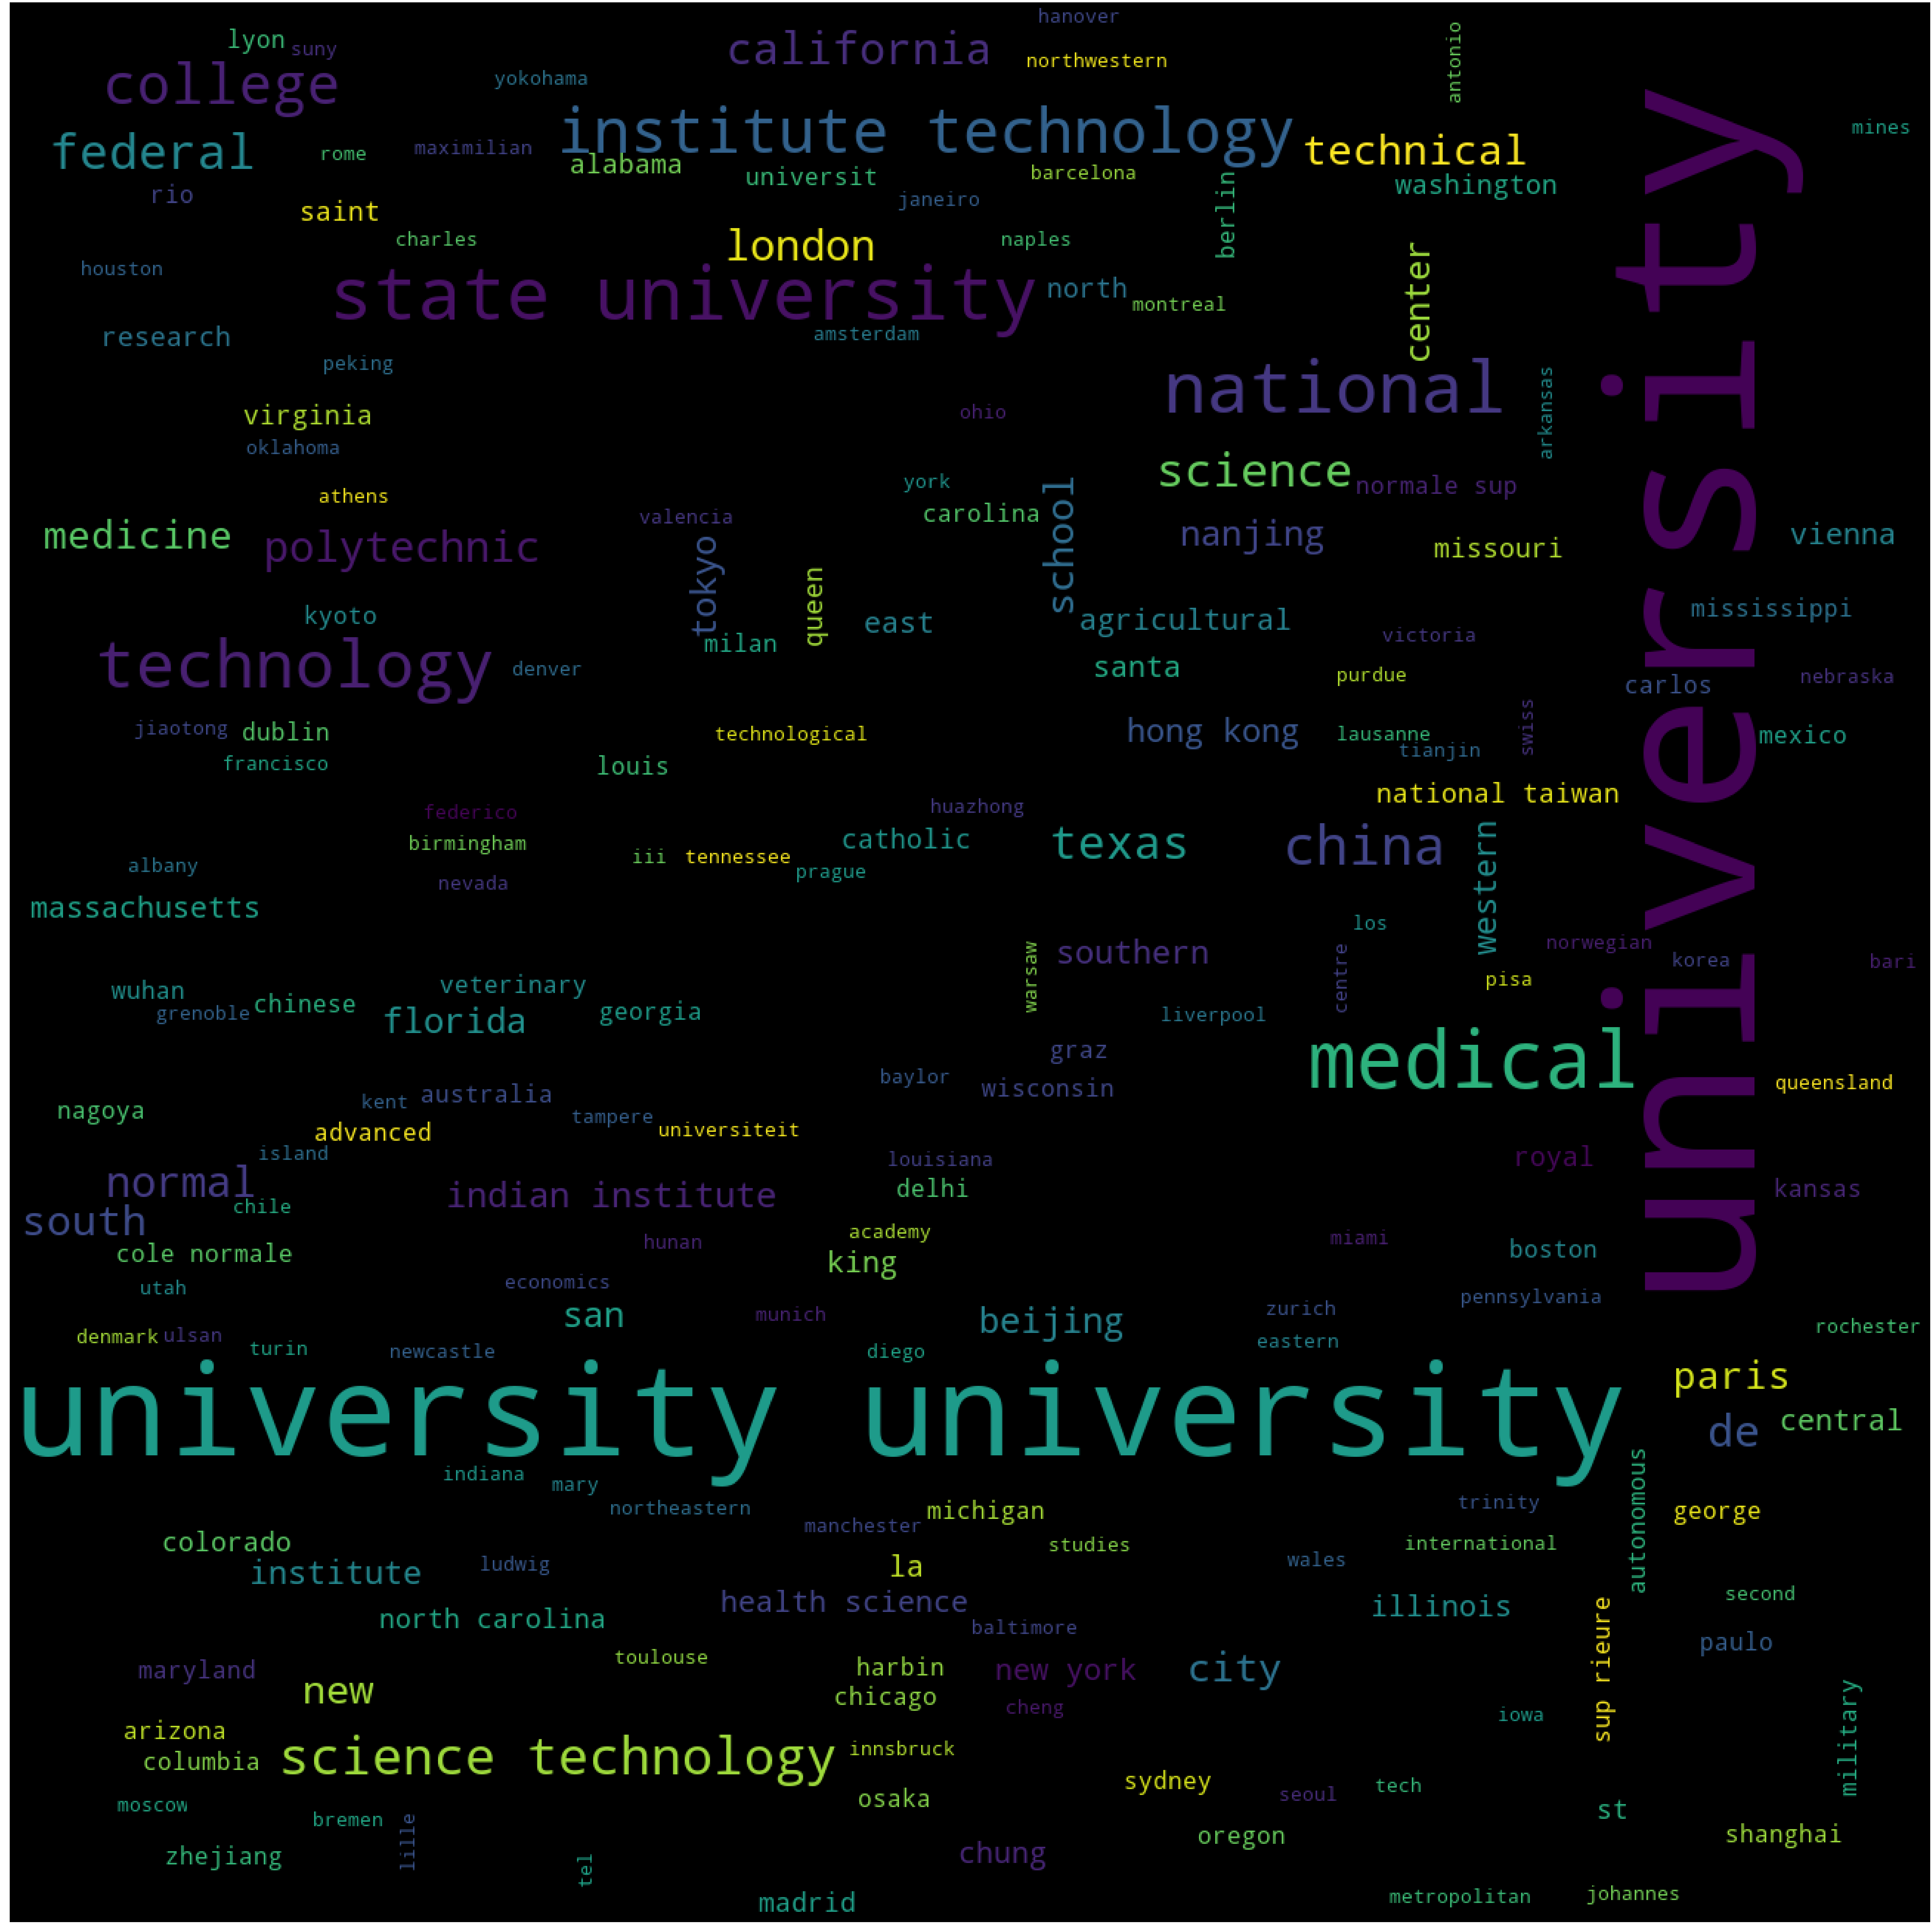

In [12]:
token = ' '.join(tokens)
from wordcloud import WordCloud
wordcloud = WordCloud(width=1300,relative_scaling = 0.5, height=1300).generate(token)   
plt.figure(figsize=(120,120))
plt.imshow(wordcloud)
plt.axis("off")

plt.show()                      
                  

In [13]:
# words that are very common and appear in many univerity names e.g university itself is not at all significant to match 
# so I am deleting these words because matching these words is not going to add anything 
stop_words = fdist.most_common(10)
stop_words = dict(stop_words)
stop_words= stop_words.keys()
stop_words

dict_keys(['university', 'of', 'technology', 'medical', 'institute', 'national', 'and', 'state', 'science', 'at'])

# data preprocessing 

In [14]:
# converting institution name  in lower case
wu['Institution']  = wu["Institution"].map(lambda x: x.lower())
ed["school"] = ed["school"].map(lambda x: x.lower())

In [15]:
def remove_punc(word):
   x = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          word)
   return x

In [16]:
# removing punctuation
ed['new_school'] = ed['school'].apply(remove_punc)

In [17]:
ed.head()

,school,degrees,new_school
0,youngstown state university,"['Bachelors of Arts', 'Associate of Arts']",youngstown state university
1,full sail real world education,['B.A.'],full sail real world education
2,"school of computer science, carnegie mellon un...","['Certificate of Completion', 'B.S.']",school of computer science carnegie mellon un...
3,university of california,['Bachelor of Science'],university of california
4,king's college london,['MBA'],king s college london


In [18]:
# removing stop words 

ed['new_school'] = ed['new_school'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [19]:
ed.head(10)

,school,degrees,new_school
0,youngstown state university,"['Bachelors of Arts', 'Associate of Arts']",youngstown
1,full sail real world education,['B.A.'],full sail real world education
2,"school of computer science, carnegie mellon un...","['Certificate of Completion', 'B.S.']",school computer carnegie mellon
3,university of california,['Bachelor of Science'],california
4,king's college london,['MBA'],king s college london
5,loyola marymount university,"['BSc', 'International Baccalaureate']",loyola marymount
6,new york institute of technology,['B.A.'],new york
7,university of california los angeles,"['MA', 'Bachelor']",california los angeles
8,chartered institute of marketing uk,"['M.D.', 'B.A.']",chartered marketing uk
9,"university of southern california, marshall sc...",['Bachelor of Arts'],southern california marshall school business


In [20]:
# I tried using TF-IDF method but realized that it does not work in this case. The reason is that TF-IDF removes 
# frequent words from a sentence. Here, any word would appear only once in a sentence .
# SO instead of that I removed generic  words from the names of the college  

# Text matching

In [21]:
# It is a function that I made to match all the words.
# Here my approach is to ignrore the order so university of  california is equal to california university 
# If there is more than 1 match then I am taking median of all the colleges that match 

In [22]:
import re

In [23]:
def match4(resume):
    #print(resume)
    flag =0
    wu.match = 0
    ranking = None
    res = resume.split()
    for index,row in wu.iterrows():
            lookup = wu.ix[index,'Institution']
            rank = wu.ix[index,'rank']
            
            result = all(word in lookup for word in res)
            
            if result :
                        wu.ix[index,'match'] =1
                        c= row['Institution']
                        ranking =  row['rank']
                        flag += 1
                        #return  resume,lookup,rank
            else:
                #print(index,'notfounc')
                continue
    if flag ==1:
        return resume,c,int(ranking)
    elif flag ==0:
        return resume,None,None
    else:
        rank = wu[wu['match']==1].groupby('match')['rank'].median()[1] # taking median of all college that match 
        return resume,None,int(rank)

           
    

In [24]:
# callling the function for all the rows
ed['final'] =ed['new_school'].apply(match4)


C:\Users\prachi-mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [25]:
# converting the tuple in separate columns 
ed[['resume_school','ranking_school','rank']]   =  ed['final'].apply(pd.Series)

In [26]:
ed[['school','ranking_school','rank']]

,school,ranking_school,rank
0,youngstown state university,None,NaN
1,full sail real world education,None,NaN
2,"school of computer science, carnegie mellon un...",None,NaN
3,university of california,None,48.0
4,king's college london,king's college london,78.0
5,loyola marymount university,None,NaN
6,new york institute of technology,None,72.0
7,university of california los angeles,"university of california, los angeles",15.0
8,chartered institute of marketing uk,None,NaN
9,"university of southern california, marshall sc...",None,NaN


In [27]:
# This algorithm will give approximate results of the matched college name and the rank/median rank.
# Considering the time constraint this will work for most of the cases

# Pros 

In [30]:
# This will match when the college name is written in wrong order
# e.g connecticur university and university of connecticut would be matched here 

# Cons

In [ ]:
# This algorithm will nont work for abbreviation and spelling mistake 
# we can use fuzzy logic 